In [20]:
import pandas as pd

In [21]:
import numpy as np

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline
df = pd.read_csv("C:/Users/Gabe/Documents/Elmhurst/MDS 564/NY project/NYPD_Complaint_Data_Historic.csv", low_memory=False)

In [25]:
population = pd.read_csv("C:/Users/Gabe/Documents/Elmhurst/MDS 564/NY project/Population_by_Borough_NYC.csv")

In [26]:
pop = population.copy()
pop.drop(['Age Group', '1950 - Boro share of NYC total','1960 - Boro share of NYC total',
         '1970 - Boro share of NYC total','1980 - Boro share of NYC total',
          '1990 - Boro share of NYC total','2000 - Boro share of NYC total',
          '2010 - Boro share of NYC total','2020 - Boro share of NYC total',
          '2030 - Boro share of NYC total','2040 - Boro share of NYC total'], axis=1, inplace=True) 

In [27]:
pop

,Borough,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040
0,NYC Total,"7,891,957","7,781,984","7,894,862","7,071,639","7,322,564","8,008,278","8,242,624","8,550,971","8,821,027","9,025,145"
1,Bronx,"1,451,277","1,424,815","1,471,701","1,168,972","1,203,789","1,332,650","1,385,108","1,446,788","1,518,998","1,579,245"
2,Brooklyn,"2,738,175","2,627,319","2,602,012","2,230,936","2,300,664","2,465,326","2,552,911","2,648,452","2,754,009","2,840,525"
3,Manhattan,"1,960,101","1,698,281","1,539,233","1,428,285","1,487,536","1,537,195","1,585,873","1,638,281","1,676,720","1,691,617"
4,Queens,"1,550,849","1,809,578","1,986,473","1,891,325","1,951,598","2,229,379","2,250,002","2,330,295","2,373,551","2,412,649"
5,Staten Island,"191,555","221,991","295,443","352,121","378,977","443,728","468,730","487,155","497,749","501,109"


In [28]:
dfcrime = df.copy()
dfcrime.drop(['JURIS_DESC', 'ADDR_PCT_CD', 'PARKS_NM', 'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon', 'LOC_OF_OCCUR_DESC', 'KY_CD', 'PD_CD', 'PD_CD'], axis=1, inplace=True)
dfcrime.columns = ['CMPLT_NUM', 'CMPLNT_FR_DT','CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 
                   'RPT_DT', 'OFNS_DESC', 'PD_DESC', 'CRM_STTUS', 'LAW_CODE', 
                   'BORO_NM', 'PREM_TYP_DESC']
dfcrime.head()

,CMPLT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,CRM_STTUS,LAW_CODE,BORO_NM,PREM_TYP_DESC
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,BAR/NIGHT CLUB
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,MURDER & NON-NEGL. MANSLAUGHTER,NaN,COMPLETED,FELONY,QUEENS,NaN
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,MANHATTAN,OTHER
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,QUEENS,RESIDENCE-HOUSE
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,OTHER


In [30]:
"""Create a datetime index of times that crimes were reported to have been committed"""

df2 = dfcrime.copy()
def eliminate_nonsense_dates(x):
    if x[2] > '2050':
        x = None
    elif x[2] < '2010':
        x = None
    else:
        aa= '/'.join(x)
        return (aa)

df2 = df2.join(df2['LAW_CODE'].str.get_dummies()) #get dummy columns for crime categories
df2.dropna(subset=['CMPLNT_FR_DT'], inplace=True) #drop empty dates
df2['CMPLNT_FR_DT'] = df2['CMPLNT_FR_DT'].str.split("/") #create a list for each value
df2['CMPLNT_FR_DT'] = df2['CMPLNT_FR_DT'].apply(lambda x: eliminate_nonsense_dates(x))

df2['Date_OCCRD'] = df2['CMPLNT_FR_DT'] +' '+df2['CMPLNT_FR_TM'] #Combing date and time columns
df2['Date_OCCRD'] = pd.to_datetime(df2['Date_OCCRD'])
df2.set_index('Date_OCCRD', inplace=True)           #set full date as index

df2.head()

,CMPLT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,CRM_STTUS,LAW_CODE,BORO_NM,PREM_TYP_DESC,FELONY,MISDEMEANOR,VIOLATION
Date_OCCRD,,,,,,,,,,,,,,,
2015-12-31 23:45:00,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,BAR/NIGHT CLUB,1,0,0
2015-12-31 23:36:00,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,MURDER & NON-NEGL. MANSLAUGHTER,NaN,COMPLETED,FELONY,QUEENS,NaN,1,0,0
2015-12-31 23:30:00,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,MANHATTAN,OTHER,1,0,0
2015-12-31 23:30:00,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,QUEENS,RESIDENCE-HOUSE,0,1,0
2015-12-31 23:25:00,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,OTHER,0,1,0


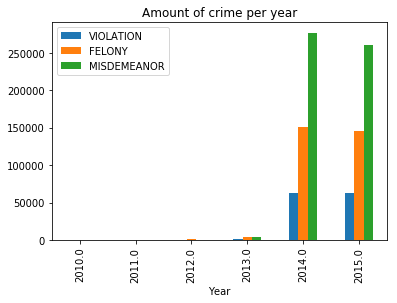

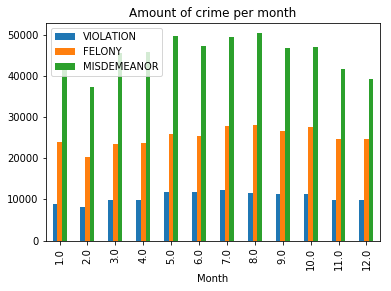

Significantly more crimes happen on the 1st of the month


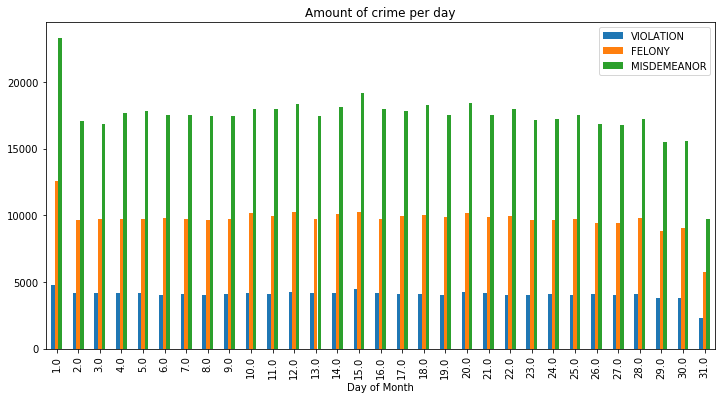

It seems like more crimes happen in the afternoon than at night


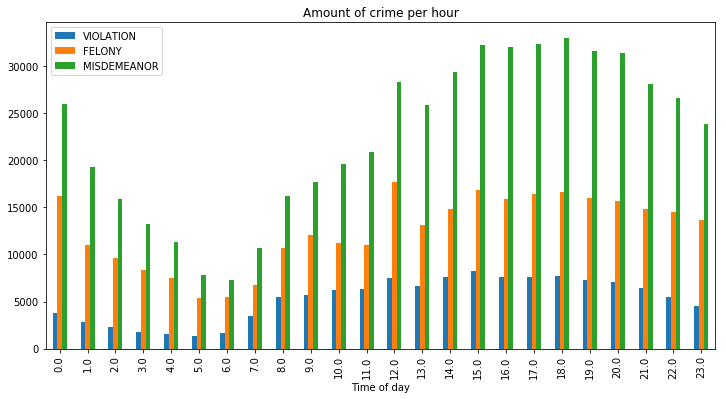

In [31]:
"""Analysis of Violations, Felonies and Misdemeanor"""

dfYear = df2.iloc[:969550] #slice dataframe so it includes only 2014-2015 data
dfYear.index = dfYear.index.year
vis0 = dfYear.groupby([dfYear.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()
vis0.plot.bar()
plt.title('Amount of crime per year')
plt.xlabel('Year')
plt.show()

dfMonth = df2.iloc[:969550] 
dfMonth.index = dfMonth.index.month
vis1 = dfMonth.groupby([dfMonth.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()
vis1.plot.bar()
plt.title('Amount of crime per month')
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.show()

dfDay = df2.iloc[:969550] 
print ("Significantly more crimes happen on the 1st of the month")
dfDay.index = dfDay.index.day
vis2 = dfDay.groupby([dfDay.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()
vis2.plot.bar(figsize=(12,6))
plt.title('Amount of crime per day')
plt.xlabel('Day of Month')
plt.show()

dfHour = df2.iloc[:969550] 
print ("It seems like more crimes happen in the afternoon than at night")
dfHour.index = dfHour.index.hour  
vis3 = dfHour.groupby([dfHour.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()
vis3.plot.bar(figsize=(12,6))
plt.title('Amount of crime per hour')
plt.xlabel('Time of day')
plt.show()

Amount of crime (by hour): At what hour were crimes reported to have started on?


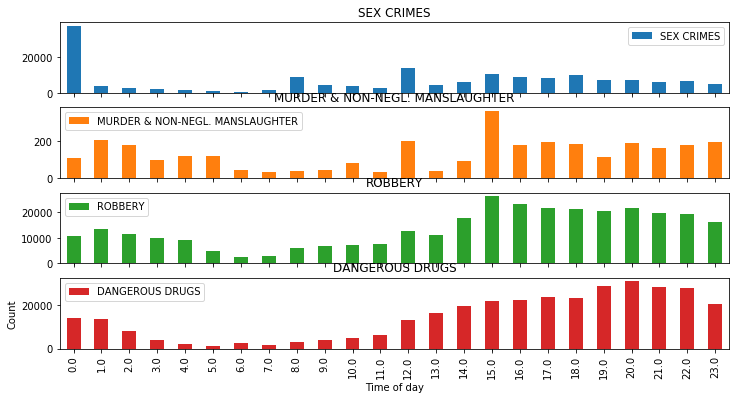

In [32]:
dfOfense = df2.copy()
dummies = dfOfense['OFNS_DESC'].str.get_dummies()
dfOfense = dfOfense.join(dummies[['SEX CRIMES', 'MURDER & NON-NEGL. MANSLAUGHTER', 
                        'ROBBERY', 'DANGEROUS DRUGS']])
dfOfense.index = dfOfense.index.hour
vis0 = dfOfense.groupby([dfOfense.index.get_level_values(0)])[['SEX CRIMES', 
                                                               'MURDER & NON-NEGL. MANSLAUGHTER', 
                                                               'ROBBERY', 'DANGEROUS DRUGS']].sum()
vis0.plot.bar(figsize=(12,6), subplots=True)
print('Amount of crime (by hour): At what hour were crimes reported to have started on?')
plt.xlabel('Time of day')
plt.ylabel('Count')
plt.show()

In [33]:
dfMarijane = df2.copy()
dfMarijane = dfMarijane[dfMarijane['OFNS_DESC']=='DANGEROUS DRUGS']
length = len(dfMarijane['PD_DESC'])
Marijane = dfMarijane['PD_DESC'].str.contains('MARIJUANA')*1
Marijane = Marijane.sum()
perctge = Marijane/length
print(str(perctge)+'% of dangerous drugs crimes are related to marijuana')

0.499050432581% of dangerous drugs crimes are related to marijuana


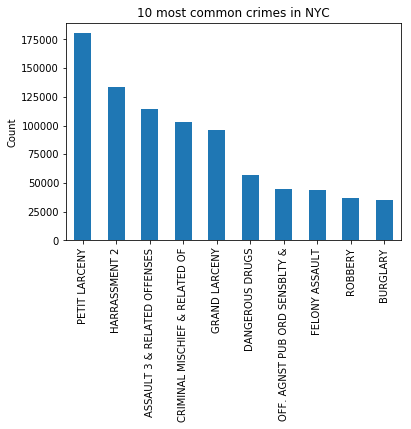

In [34]:
"""10 most common crimes in NYC, by year"""

df2['OFNS_DESC'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('10 most common crimes in NYC')
plt.show()

C:\Users\Gabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


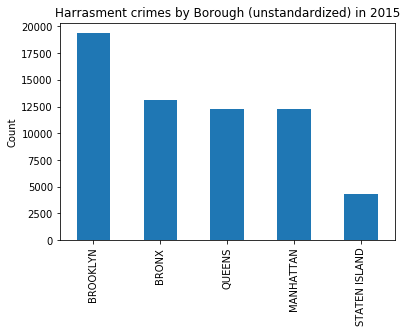

In [35]:
"""Harrasment crimes by boro in 2015 (unstandardized)"""

Boro_Crime = df2.copy()
Boro_Crime = Boro_Crime[Boro_Crime['OFNS_DESC']=='HARRASSMENT 2']
Boro_Crime.index = Boro_Crime.index.year
Boro_Crime = Boro_Crime.ix[2015]
Boro_Crime['BORO_NM'].value_counts().plot.bar()

plt.ylabel('Count')
plt.title('Harrasment crimes by Borough (unstandardized) in 2015')
plt.show()

Although from the plot above, we see that Brooklyn has 4x more harrasment crimes than Staten Island, when considering population size, we see that Harrasment in Staten Island is approximately 20% more pervasive


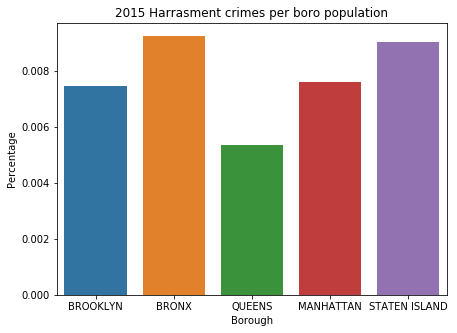

,Borough,2015_population
0,BRONX,1415948.0
1,BROOKLYN,2600681.5
2,MANHATTAN,1612077.0
3,QUEENS,2290148.5
4,STATEN ISLAND,477942.5


In [36]:
"""Harrasment by boro population in 2015 (standardized)"""
b = Boro_Crime['BORO_NM'].value_counts()
borough = pd.DataFrame(b).reset_index()
borough.columns=['Borough','HARRASSMENT']

#use linear interpolation to figure out population per boro in 2015
boro_pop = pop.copy()
boro_pop.drop(0,inplace=True)
boro_pop['Borough'] = boro_pop['Borough'].map(lambda x: x.upper())
boro_pop = boro_pop.transpose() #turn all values in 1st column into column headers
boro_pop.reset_index(inplace=True)
boro_pop[1] = boro_pop[1].str.strip() #strip white space from first column header
boro_pop[2] = boro_pop[2].str.strip() #strip white space from second column header
boro_pop[3] = boro_pop[3].str.strip()
boro_pop[4] = boro_pop[4].str.strip()
boro_pop[5] = boro_pop[5].str.strip()
boro_pop.columns = boro_pop.iloc[0]    #turn index '0' with of boro names to column header

boro_pop.drop(0,axis=0, inplace=True) #drop row with index 0
boro_pop = boro_pop.rename(columns={'Borough':'Year'})
boro_pop['Year'] = pd.to_datetime(boro_pop['Year'], format='%Y')
boro_pop.set_index('Year', inplace=True) #index the year column
boro_pop = boro_pop.resample('A').sum()  #create years in bewtween the decades provided
boro_pop = boro_pop.apply(lambda x: x.str.replace(',',''))
boro_pop.replace(np.nan,0, inplace=True)
boro_pop = boro_pop.astype(int)

#merge dataframes population and crimes
copy_pop15 = boro_pop.replace(0,np.nan).interpolate('linear')[65:66].transpose() #slice to get the 2015 only
copy_pop15.columns = ['2015']
copy_pop15.reset_index(inplace=True)
copy_pop15.columns = ['Borough', '2015_population']
boro_crimes = borough.merge(copy_pop15, on='Borough')

#calculate crime as percentage of population
print ('Although from the plot above, we see that Brooklyn has 4x more harrasment crimes than Staten Island, when \
considering population size, we see that Harrasment in Staten Island is approximately 20% more pervasive')
boro_crimes['crime_per_pop'] =  boro_crimes['HARRASSMENT'] / boro_crimes['2015_population']
plt.figure(figsize=(7,5))
sns.barplot(x='Borough', y='crime_per_pop', data=boro_crimes)
plt.ylabel('Percentage')
plt.title('2015 Harrasment crimes per boro population')
plt.show()
copy_pop15

C:\Users\Gabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


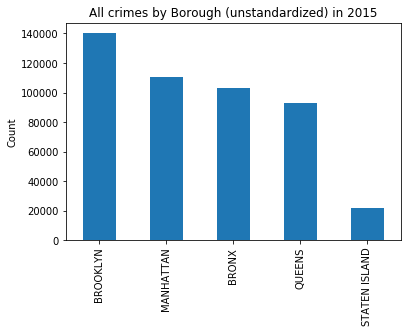

In [37]:
"""All NYC crimes reported by boro in 2015 (unstandardized)"""

All_crimes = df2.copy()
All_crimes.index = All_crimes.index.year
All_crimes = All_crimes.ix[2015]
All_crimes['BORO_NM'].value_counts().plot.bar()

plt.ylabel('Count')
plt.title('All crimes by Borough (unstandardized) in 2015')
plt.show()

Although from plot above, we see that Brooklyn has almsot 40% more crime than the Bronx in absolute numbers, when considering population size, we see that overall crime in the Bronx is almost 30% more pervasive than in Brooklyn


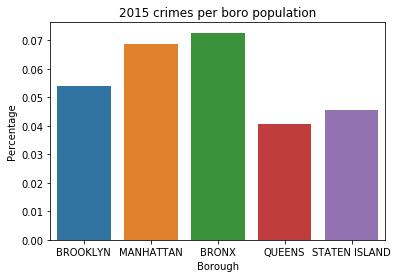

In [38]:
"""All crimes by boro population in 2015 (standardized)"""

b1 = All_crimes['BORO_NM'].value_counts()
borough1 = pd.DataFrame(b1).reset_index()
borough1.columns=['Borough','Crimes']

#use linear interpolation to figure out population per boro in 2015
boro_pop1 = pop.copy()
boro_pop1.drop(0,inplace=True)
boro_pop1['Borough'] = boro_pop1['Borough'].map(lambda x: x.upper())
boro_pop1 = boro_pop1.transpose() #turn all values in 1st column into column headers
boro_pop1.reset_index(inplace=True)
boro_pop1[1] = boro_pop1[1].str.strip() #strip white space from first column header
boro_pop1[2] = boro_pop1[2].str.strip() #strip white space from second column header
boro_pop1[3] = boro_pop1[3].str.strip()
boro_pop1[4] = boro_pop1[4].str.strip()
boro_pop1[5] = boro_pop1[5].str.strip()
boro_pop1.columns = boro_pop1.iloc[0]    #turn index '0' with of boro names to column header

boro_pop1.drop(0,axis=0, inplace=True) #drop row with index 0
boro_pop1 = boro_pop1.rename(columns={'Borough':'Year'})
boro_pop1['Year'] = pd.to_datetime(boro_pop1['Year'], format='%Y')
boro_pop1.set_index('Year', inplace=True) #index the year column
boro_pop1 = boro_pop1.resample('A').sum()  #create years in bewtween the decades provided
boro_pop1 = boro_pop1.apply(lambda x: x.str.replace(',',''))
boro_pop1.replace(np.nan,0, inplace=True)
boro_pop1 = boro_pop1.astype(int)

#merge dataframes
pop15 = boro_pop1.replace(0,np.nan).interpolate('linear')[65:66].transpose() #slice to get the year 2015
pop15.columns = ['2015']
pop15.reset_index(inplace=True)
pop15.columns = ['Borough', '2015']
boro_crimes1 = borough1.merge(pop15, on='Borough')

#calculate crime as percentage of population
print ('Although from plot above, we see that Brooklyn has almsot 40% more crime than the Bronx in absolute\
 numbers, when considering population size, we see that overall crime in the Bronx is almost 30% more pervasive than\
 in Brooklyn')
boro_crimes1['crime_per_pop'] =  boro_crimes1['Crimes'] / boro_crimes1['2015']
sns.barplot(x='Borough', y='crime_per_pop', data=boro_crimes1)
plt.ylabel('Percentage')
plt.title('2015 crimes per boro population')
plt.show()